In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%load_ext autoreload
%autoreload 2

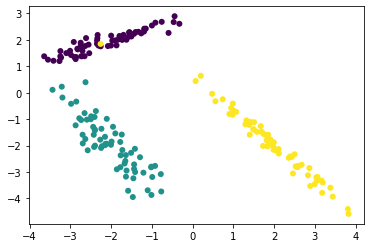

In [5]:
X, y = make_classification(n_samples=200, n_features=2, n_classes=3, n_informative=2, n_redundant=0,
                          n_clusters_per_class=1, class_sep=2.0, random_state=101)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, linewidth=0, edgecolor=None)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(float), test_size=0.33, random_state=101)

In [9]:
clf = LogisticRegression()
clf.fit(X_train, y_train.astype(int))
y_clf = clf.predict(X_test)

print(classification_report(y_test, y_clf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        24
         1.0       1.00      1.00      1.00        22
         2.0       1.00      1.00      1.00        20

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



([], <a list of 0 Text major ticklabel objects>)

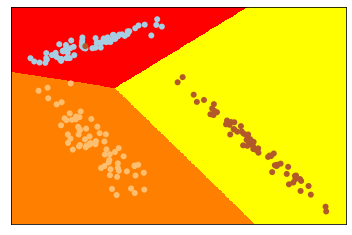

In [10]:
h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', linewidth=0, cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

In [11]:
print(X_test[0])
print(y_test[0])
print(y_clf[0])

[-3.26744968  1.19639333]
0.0
0


In [21]:
clf.predict_proba([X_test[0]])

array([[0.85126747, 0.13897348, 0.00975905]])